### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np

In [2]:
index=['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6',
       'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4','AI_5', 'AI_6','AS(NA)_0',
       'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6','BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 
       'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6','AS(NAC)_0',
       'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4','AS(NAC)_5', 'AS(NAC)_6',
       'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 
       'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6','NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6',
       'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3','ADL_4', 'ADL_5', 'ADL_6','NAD_0', 'NAD_1', 'NAD_2','NAD_3', 'NAD_4', 'NAD_5', 
       'NAD_6','Buzz']
twt = pd.read_csv('Twitter-Absolute-Sigma-500.data',names = index)

In [3]:
twt.head(1)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0


In [4]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [5]:
twt.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [6]:
y = twt['Buzz']
X = twt.drop('Buzz',axis=1)

In [7]:
X.head(1)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,1.0,889,939,960,805,805,1143,1121


In [8]:
y.head(1)

0    1.0
Name: Buzz, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
sample_X1, sample_X2, sample_y1,sample_y2 = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(sample_X2, sample_y2, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <font color='purple'>Hard Voting Classifier #1

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(7)
svm_clf = SVC(C = 10, probability = True)
dt = DecisionTreeClassifier(max_depth = 5,random_state= 0)


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf),('dt',dt)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeigh...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, dt,voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9424443391757461
KNeighborsClassifier 0.9587873045949786
SVC 0.9417337754618664
DecisionTreeClassifier 0.958076740881099
VotingClassifier 0.9431549028896258


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# <font color='purple'>Hard Voting Classifier #2

In [16]:
dtc = DecisionTreeClassifier(max_depth = 5,random_state= 0)
svm = SVC(random_state=0,kernel='rbf')
log_clf2 = LogisticRegression()

In [17]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf2), ('dt', dtc), ('svc', svm)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...bf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [18]:
from sklearn.metrics import accuracy_score
for clf in (dtc, svm, log_clf2, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.958076740881099
SVC 0.8827569872098532
LogisticRegression 0.9424443391757461
VotingClassifier 0.9412600663192799


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# <font color='purple'>Soft Voting Classifier #1

In [19]:
log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(7)
svm_clf = SVC(C = 10, probability = True)
dt = DecisionTreeClassifier(max_depth = 5,random_state= 0)


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf),('dt',dt)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeigh...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [20]:
for clf in (log_clf, knn_clf, svm_clf, dt, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9424443391757461
KNeighborsClassifier 0.9587873045949786
SVC 0.9417337754618664
DecisionTreeClassifier 0.958076740881099
VotingClassifier 0.9616295594504974


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# <font color='purple'>Soft Voting Classifier #2

In [21]:
dtc = DecisionTreeClassifier(max_depth = 5,random_state= 0)
svm = SVC(random_state=0,kernel='rbf')
log_clf2 = LogisticRegression()


voting_clf = VotingClassifier(estimators=[('lr', log_clf2), ('dt', dtc), ('svc', svm)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
for clf in (dtc, svm, log_clf2, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.958076740881099
SVC 0.8827569872098532
LogisticRegression 0.9424443391757461
VotingClassifier 0.9412600663192799


C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# <font color='purple'>KNN Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 25)

bag_clf = BaggingClassifier(knn, n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1, random_state=0)

In [23]:
bag_clf.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred = bag_clf.predict(X_test_scaled)

In [25]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9414969208905732


# <font color='purple'>Logistic Bagging

In [31]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(penalty = 'l1', C = 1,random_state=0)
bag_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1, random_state=0)

In [32]:
bag_log.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [34]:
y_pred2 = bag_log.predict(X_test_scaled)

In [35]:
print(accuracy_score(y_test, y_pred2))

0.8114637612505922


# <font color='purple'>Pasting with desision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5,random_state= 0)
pas_dt = BaggingClassifier(dt, n_estimators=500, max_samples=200, bootstrap=False, n_jobs=-1, random_state=0)

In [38]:
pas_dt.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [40]:
y_pred3 = pas_dt.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred3))

# <font color='purple'>Pasting with Linear SVC

In [41]:
from sklearn.svm import LinearSVC
svc_lin = LinearSVC(C =10,penalty='l2',random_state=0)
pas_svc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=200, bootstrap=False, n_jobs=-1, random_state=0)

In [42]:
pas_svc.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [43]:
y_pred4 = pas_svc.predict(X_test_scaled)

In [44]:
print(accuracy_score(y_test, y_pred4))

0.9616295594504974


# <font color='purple'>Ada Boost Classifier with Decision Tree

In [45]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)


In [46]:
ada_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [47]:
y_pred5 = ada_clf.predict(X_test_scaled)

In [48]:
print(accuracy_score(y_test, y_pred5))

0.9604452865940313


# <font color='purple'>Ada Boost Classifier with Logistic Regression

In [49]:
ada_clf2 = AdaBoostClassifier(LogisticRegression(penalty = 'l1', C = 1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)


In [50]:
ada_clf2.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [51]:
y_pred6 = ada_clf2.predict(X_test_scaled)

In [52]:
print(accuracy_score(y_test, y_pred6))

0.7972524869729986


# <font color='purple'>Model With Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0,max_depth=5,learning_rate=0.01)
gbrt.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [54]:
y_pred7 = gbrt.predict(X_test_scaled)

In [55]:
print(accuracy_score(y_test, y_pred7))

0.9599715774514448


# <font color='purple'>PCA

In [56]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


pca = PCA()
pca.fit(sample_X2)
X_pca = pca.transform(sample_X2)
print("original shape:   ", sample_X2.shape)
print("transformed shape:", X_pca.shape)

original shape:    (14071, 77)
transformed shape: (14071, 77)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, sample_y2, test_size = 0.3, random_state = 42)

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
report2 = pd.DataFrame(index = None,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,20,25]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train)
j = grid_knn.score(X_train_scaled, y_train)
j

0.9821142429181741

In [61]:
k = grid_knn.score(X_test_scaled, y_test)
k

0.9563515925136299

In [62]:
y_knn_predict = grid_knn.predict(X_test_scaled)
y_knn_train_predict = grid_knn.predict(X_train_scaled)

In [63]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.92
Test roc_auc_score: 0.92 


In [64]:
report2 = report2.append(pd.Series({'Model name':'KNN Classifier', 'Model parameter':grid_knn.best_params_, 'Train accuracy':j, 'Test accuracy':k, 'Train auc score':roc_auc_score(y_knn_train_predict, y_train), 'Test auc score':roc_auc_score(y_knn_predict, y_test)}),ignore_index=True)

In [65]:
report2

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,KNN Classifier,{'n_neighbors': 25},0.982114,0.956352,0.922212,0.921319


In [66]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)

param_grid = {'penalty':['l1', 'l2']}

grid_log = GridSearchCV(log_clf , param_grid, cv = 5, return_train_score=True, scoring='roc_auc')
grid_log.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [67]:
l = grid_log.score(X_train_scaled, y_train)
l

0.9914949669356325

In [68]:
m = grid_log.score(X_test_scaled, y_test)
m

0.9909272940787996

In [69]:
y_log_predict = grid_log.predict(X_test_scaled)
y_log_train_predict = grid_log.predict(X_train_scaled)

In [70]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


In [71]:
report2 = report2.append(pd.Series({'Model name':'Logistic Regression', 'Model parameter':grid_log.best_params_, 'Train accuracy':l, 'Test accuracy':m, 'Train auc score':roc_auc_score(y_log_train_predict, y_train), 'Test auc score':roc_auc_score(y_log_predict, y_test)}),ignore_index=True)

In [72]:
report2

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,KNN Classifier,{'n_neighbors': 25},0.982114,0.956352,0.922212,0.921319
1,Logistic Regression,{'penalty': 'l1'},0.991495,0.990927,0.955781,0.949780


In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

grid_dt = GridSearchCV(dt_clf, param_grid, cv = 5,scoring = 'roc_auc', return_train_score=True)
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [74]:
n = grid_dt.score(X_train_scaled, y_train)
n

0.9900979915018614

In [75]:
o = grid_dt.score(X_test_scaled, y_test)
o

0.975273805332744

In [76]:
y_dt_predict = grid_dt.predict(X_test_scaled)
y_dt_train_predict = grid_dt.predict(X_train_scaled)

In [77]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dt_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dt_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.94 


In [78]:
report2 = report2.append(pd.Series({'Model name':'Decision Tree', 'Model parameter':grid_dt.best_params_, 'Train accuracy':n, 'Test accuracy':o, 'Train auc score':roc_auc_score(y_dt_train_predict, y_train), 'Test auc score':roc_auc_score(y_dt_predict, y_test)}),ignore_index=True)

In [79]:
report2

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,KNN Classifier,{'n_neighbors': 25},0.982114,0.956352,0.922212,0.921319
1,Logistic Regression,{'penalty': 'l1'},0.991495,0.990927,0.955781,0.949780
2,Decision Tree,{'max_depth': 5},0.990098,0.975274,0.961156,0.935880


In [80]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[ 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [81]:
grid_svc_lin.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [82]:
p = grid_svc_lin.score(X_train_scaled, y_train)
p

0.9923528965268362

In [83]:
q = grid_svc_lin.score(X_test_scaled, y_test)
q

0.989158093145206

In [84]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train_scaled)
y_svc_lin_predict = grid_svc_lin.predict(X_test_scaled)

In [85]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_svc_lin_predict_train, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_svc_lin_predict, y_test))

Train roc_auc_score: 0.97
Test roc_auc_score: 0.95 


In [86]:
report2 = report2.append(pd.Series({'Model name':'Linear Support Vactor Machine', 'Model parameter':grid_svc_lin.best_params_, 'Train accuracy':p, 'Test accuracy':q, 'Train auc score':roc_auc_score(y_svc_lin_predict_train, y_train), 'Test auc score':roc_auc_score(y_svc_lin_predict, y_test)}),ignore_index=True)

In [87]:
from sklearn.svm import SVC
param_grid = {'C':[ 0.01, 0.1,1, 10, 50], 'max_iter':[1000,10000], 'gamma':[0.01, 0.1, 0.5, 1]}

grid_search = GridSearchCV(SVC(random_state=0,kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\

C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paritosh\Anaconda3\

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 50], 'max_iter': [1000, 10000], 'gamma': [0.01, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [88]:
y1 = grid_search.score(X_train_scaled, y_train)
y1

0.9648695299015129

In [89]:
z = grid_search.score(X_test_scaled, y_test)
z

0.9547607768829939

In [90]:
y_knn_predict = grid_search.predict(X_test_scaled)
y_knn_train_predict = grid_search.predict(X_train_scaled)

In [91]:
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.92 


In [92]:
report2 = report2.append(pd.Series({'Model name':'Kernelized Support Vector Machine', 'Model parameter':grid_search.best_params_, 'Train accuracy':y1, 'Test accuracy':z, 'Train auc score':roc_auc_score(y_knn_train_predict, y_train), 'Test auc score':roc_auc_score(y_knn_predict, y_test)}),ignore_index=True)

In [95]:
report2

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,KNN Classifier,{'n_neighbors': 25},0.982114,0.956352,0.922212,0.921319
1,Logistic Regression,{'penalty': 'l1'},0.991495,0.990927,0.955781,0.949780
2,Decision Tree,{'max_depth': 5},0.990098,0.975274,0.961156,0.935880
3,Linear Support Vactor Machine,{'C': 10},0.992353,0.989158,0.965445,0.950110
4,Kernelized Support Vector Machine,"{'C': 50, 'gamma': 1, 'max_iter': 1000}",0.964870,0.954761,0.937500,0.922409


Scores without PCA (below)

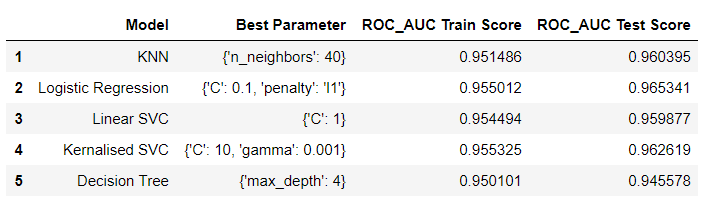

We see here that the scores for regression is better without PCA. This could be beacuse we could be losing important information by doing PCA.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(256, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,  kernel_initializer='normal'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 20, batch_size = 150)

In [ ]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))